In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.patches import Rectangle

In [ ]:
# Configurações do Estado da Paraíba
gdf = gpd.read_file('../datas/external/brazil-states.geojson', encoding='utf-8')
estado_gdf = gdf[gdf['name'] == 'Paraíba']

## Mapa de Precipitação Mensal Anual Acumulada (Dados Locais)

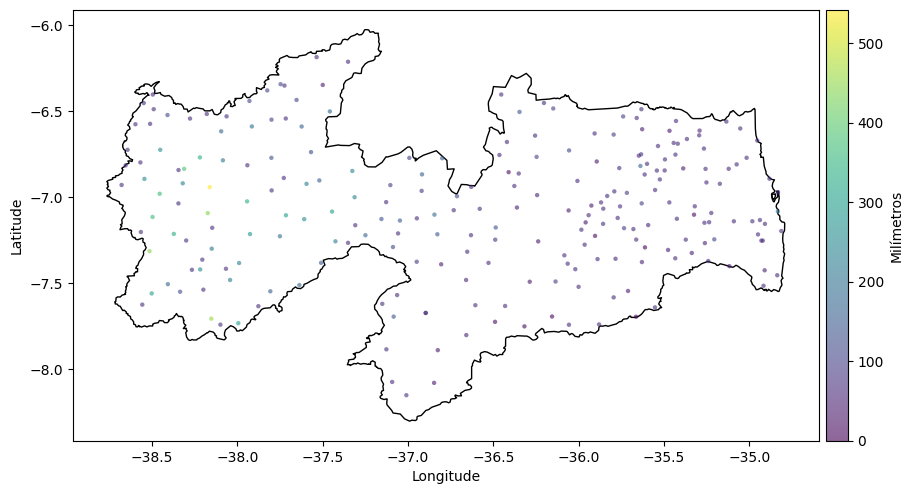

In [74]:
# Carregar os dados
df_aesa_sum = pd.read_csv("../datas/interim/2.3.1_aesa_database_create/aesa_1994-2023_mon_sum.csv")
df_aesa_sum = df_aesa_sum[(df_aesa_sum['ano'] == 1994) & (df_aesa_sum['mes'] == 1)]

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o mapa base do estado
estado_gdf.plot(ax=ax, color='white', edgecolor='black')

# Plotar os dados preditos como uma imagem
scatter = ax.scatter(df_aesa_sum['lon'], df_aesa_sum['lat'], c=df_aesa_sum['pr_local'], cmap='viridis', alpha=0.6, s=10, edgecolors='none')

# Adicionar uma barra de cores
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.8, pad=0.01, fraction=0.0278)
cbar.set_label('Milímetros')

# Adicionar títulos e rótulos
# plt.title('Mapa de Precipitação Mensal Anual Acumulada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostrar o mapa
plt.show()

## Mapa de Precipitação Mensal Anual Acumulada (Dados CMIP6)

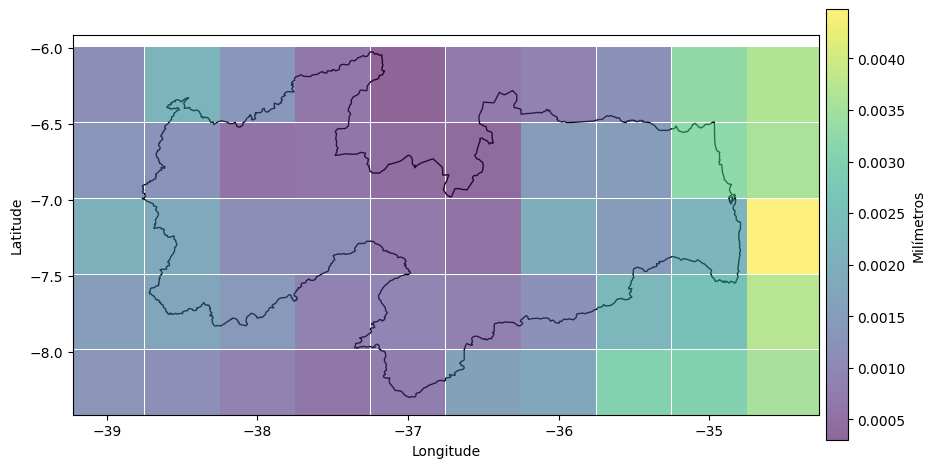

In [77]:
# Carregar os dados
df_cmip6_sum = pd.read_csv('../datas/interim/1.3.2_cmip6_database_create/pr_day_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr_19940101-21001231_sum.csv')
df_cmip6_sum['lon'] = df_cmip6_sum['lon'] - 360
df_cmip6_sum = df_cmip6_sum[(df_cmip6_sum['ano'] == 1994) & (df_cmip6_sum['mes'] == 1)]

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o mapa base do estado
estado_gdf.plot(ax=ax, color='white', edgecolor='black')

# Plotar os dados preditos como uma imagem
scatter = ax.scatter(df_cmip6_sum['lon'], df_cmip6_sum['lat'], c=df_cmip6_sum['pr'], cmap='viridis', alpha=0.6, s=2900, marker='s', edgecolors='none')

# Adicionar uma barra de cores
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.8, pad=0.01, fraction=0.0278)
cbar.set_label('Milímetros')

# Adicionar títulos e rótulos
# plt.title('Mapa de Precipitação Mensal Anual Acumulada')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostrar o mapa
plt.show()